## **Predictive Analytics Case**

**M. Rasyid Ridha**

Data yang digunakan pada proyek ini bersumber dari Kaggle pada tautan berikut ini [Daftar Harga Rumah Jabodetabek](https://www.kaggle.com/datasets/nafisbarizki/daftar-harga-rumah-jabodetabek). Menurut sumber, data daftar harga rumah ini diakses dari berdasarkan salah satu web listing di Indonesia yaitu https://rumah123.com pada akhir tahun 2022. **Dataset yang dipakai berupa data kuantitatif yang berisi 3553 baris (termasuk header)**

### Variabel-variabel pada Daftar Harga Rumah Jabodetabek dalam dataset adalah sebagai berikut:

* url : data link website penjualan rumah
* price_in_rp : harga rumah dalam rupiah
* title : judul promosi penjualan rumah
* address : alamat rumah yang dijual
* district : lokasi kawasan rumah
* city : keterangan kota lokasi rumah
* lat : data geografis rumah berdasarkan garis lintang
* long : data geografis rumah berdasarkan garis bujur
* facilities : fasilitas yang didapatkan di lingkungan perumahan
* property_tipe : jenis properti
* ads_id : nomor id iklan pada website
* bedrooms : jumlah kamar tidur tersedia
* bathrooms : jumlah kamar mandi tersedia
* land_size_m2 : luas tanah hunian
* building_size_m2 : luas bangunan hunian
* carports : ketersedian carport pada rumah
* certificate : legalitas properti
* electricity : kapasitas daya listrik dengan satuan mah
* maid_bedrooms : jumlah kamar pembantu tersedia
* maid_bathrooms : jumlah kamar mandi pembantu tersedia
* floors : jumlah lantai terbangun
* building_age : umur bangunan
* year_built : tahun pembangunan
* property_condition : keterangan kondisi rumah
* building_orientation : orientasi mata angin bangunan
* garages : jumlah garasi
* furnishing : tingkat kelengkapan atau ketersediaan perabotan dan peralatan

Kita panggil library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import xgboost as xgb
from scipy.stats import f_oneway
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

Selanjutnya kita memanggil dataset dengan format csv

In [2]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQ2Iblmh59rC190eOX1eep__U9I54JKtbnJufI0t5qJk_wQpxiDh6bc8Nb05KZBszHyjWJdYqCiAeRU/pub?output=csv'
df = pd.read_csv(url)

Data Overview

Berikut adalah sampel 5 data teratas dari dataset yang digunakan.

In [3]:
#Menampilkan 5 sampel data teratas
df.head()

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,...,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,https://www.rumah123.com/properti/bekasi/hos11...,2990000000.0,Rumah cantik Sumarecon Bekasi\nLingkungan asri...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223.945,1.069.862.751,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,...,4400 mah,0.0,1.0,2.0,5.0,2017.0,bagus,NaN,0.0,unfurnished
1,https://www.rumah123.com/properti/bekasi/hos10...,1270000000.0,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223.945,1.069.862.751,Taman,rumah,...,2200 mah,0.0,0.0,2.0,NaN,NaN,bagus,NaN,0.0,NaN
2,https://www.rumah123.com/properti/bekasi/hos10...,1950000000.0,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223.945,1.069.862.751,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,...,2200 mah,1.0,1.0,2.0,NaN,NaN,bagus,NaN,1.0,unfurnished
3,https://www.rumah123.com/properti/bekasi/hos10...,3300000000.0,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223.945,1.069.862.751,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,...,3500 mah,1.0,1.0,2.0,6.0,2016.0,bagus sekali,utara,2.0,unfurnished
4,https://www.rumah123.com/properti/bekasi/hos10...,4500000000.0,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223.945,1.069.862.751,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,...,3500 mah,1.0,1.0,2.0,9.0,2013.0,bagus,utara,1.0,unfurnished


Dependent variabel atau target feature kita adalah kolom price_in_rp. Kita ingin melihat jumlah baris dan kolom yang ada dalam dataset ini

In [4]:
##Menampilkan jumlah baris (termasuk header) dan kolom (features)
df.shape

(3553, 27)

Dataset yang digunakan terdiri dari 3.553 baris dan 27 kolom. Selanjutnya kita ingin melihat informasi jumlah data, tipe data, dan memori yang digunakan

In [5]:
#Melihat informasi data mulai dari jumlah data, tipe data, memory yang digunakan dll.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   3553 non-null   object 
 1   price_in_rp           3553 non-null   object 
 2   title                 3553 non-null   object 
 3   address               3553 non-null   object 
 4   district              3553 non-null   object 
 5   city                  3553 non-null   object 
 6   lat                   3553 non-null   object 
 7   long                  3553 non-null   object 
 8   facilities            3553 non-null   object 
 9   property_type         3552 non-null   object 
 10  ads_id                3549 non-null   object 
 11  bedrooms              3519 non-null   float64
 12  bathrooms             3524 non-null   float64
 13  land_size_m2          3551 non-null   float64
 14  building_size_m2      3551 non-null   float64
 15  carports             

Dari informasi di atas kita ketahui :
1. Ada 16 data teks objek dan 11 data numerik. Data price dideteksi sebagai data object padahal ini merupakan data target yang mesti diprediksi sehingga kita perlu ubah menjadi data numerik.
2. Ada data yang kosong yang perlu kita identifikasi jumlahnya

Pertama mari kita konversi data target menjadi numerik.

In [6]:
# Membuat fungsi konversi data objek price_in_rp menjadi data numerik (integer)
def process_price(price):
    price = price.replace('.', '')
    return int(price)

# terapkan fungsi pada kolom 'price_in_rp'
df['price_in_rp'] = df['price_in_rp'].apply(process_price)

# Display the first 5 rows
df['price_in_rp']

0       29900000000
1       12700000000
2       19500000000
3       33000000000
4       45000000000
           ...     
3548     5880000000
3549     7850000000
3550     7550000000
3551     8000000000
3552     6550000000
Name: price_in_rp, Length: 3553, dtype: int64

Selanjutnya kita identifikasi jumlah data kosong (missing value)

Informasi Pola Missing Value:
                Features  Count  Percentage
11  building_orientation   1647   46.355193
8           building_age   1445   40.669856
9             year_built   1445   40.669856
12            furnishing    387   10.892204
10    property_condition    246    6.923726
6            certificate    141    3.968477
2               bedrooms     34    0.956938
3              bathrooms     29    0.816212
7                 floors      6    0.168871
1                 ads_id      4    0.112581
4           land_size_m2      2    0.056290
5       building_size_m2      2    0.056290
0          property_type      1    0.028145


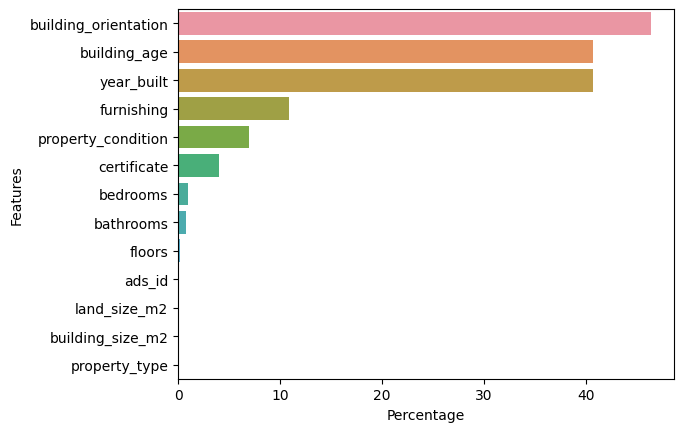

In [7]:
#Mengetahui jumlah missing value dengan satuan persentase dari data total
missing_values = df.isnull().sum()[df.isnull().sum() > 0]
missing_values = pd.DataFrame(missing_values.reset_index())
missing_values.rename(columns={'index':'Features', 0:'Count'}, inplace=True)
missing_values['Percentage'] = missing_values['Count'] / len(df) * 100
missing_values.sort_values(by='Percentage', ascending=False, inplace=True)

#Membuat diagram bar jumlah missing value
sns.barplot(x='Percentage', y='Features', data=missing_values)

# Tampilkan informasi pola missing value
print("Informasi Pola Missing Value:")
print(missing_values)

Ada 3 feature yang memiliki missing value lebih dari 11 % data sehingga kita hapus saja karena terlalu banyak missing value yang akan berpengaruh ke model jika diimputisasi. Selain itu pada price_in_rp sebagai target feature juga ada missing value yang akan kita hapus pada baris data yang kosong.

In [8]:
#Hapus kolom dengan persentase tinggi pada missing values
df_clean = df.drop(['building_orientation', 'building_age', 'year_built'], axis=1)

Adapun berikut adalah ringkasan statistik dari data-data numerikal.

In [9]:
#Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll.
df_clean.describe()

,price_in_rp,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,maid_bedrooms,maid_bathrooms,floors,garages
count,3.553000e+03,3519.000000,3524.000000,3551.000000,3551.000000,3553.000000,3553.000000,3553.000000,3547.000000,3553.000000
mean,2.763094e+14,3.326513,2.624858,204.806815,186.587440,1.197861,0.496482,0.370391,1.764590,0.708978
std,3.093777e+15,2.672148,2.696497,402.127746,248.443471,1.114996,0.685723,0.536024,0.637349,1.311879
min,4.200000e+08,1.000000,1.000000,12.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8.000000e+09,2.000000,2.000000,75.000000,65.500000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,1.500000e+10,3.000000,2.000000,108.000000,112.000000,1.000000,0.000000,0.000000,2.000000,0.000000
75%,3.600000e+10,4.000000,3.000000,192.000000,208.000000,2.000000,1.000000,1.000000,2.000000,1.000000
max,4.270000e+16,99.000000,99.000000,8000.000000,6000.000000,15.000000,7.000000,5.000000,5.000000,50.000000


Dari data ini dapat kita ambil informasi :
1. Berdasarkan count, ada missing value pada price_in_rp, bedrooms, bathrooms, land_size_m2, building_size_m2, dan floors.
2. Untuk imputisasi pada missing value sebaiknya tidak menggunakan mean pada bedrooms, bathrooms, dan floor karena isi datanya harus berupa integer tanpa koma.
3. Dari nilai min, ada data dari land_size_m2 building_size_m2 yang secara ukuran janggal
4. land_size_m2 harus lebih besar dari building_size_m2, sehingga jika ada yang tidak demikian perlu kita drop.
5. Nilai 75 % dan nilai max sangat jauh, sehingga kita harus melakukan penghapusan outlier agar model tidak terganggu

### EDA (Exploratory Data Analysis)

Disini kita perlu melakukan pembersihan dan perbaikan data sehingga analisa menjadi lebih tepat. Pertama kita perlu memeriksa data duplikat karena ada kemungkinan pengiklan mempublikasi iklan mereka secara berulang yang mana direkam dengan url yang berbeda padahal isinya sama.

In [10]:
#Mengetahui jumlah data duplikat
duplicates_nos = len(df_clean[df_clean.drop(['facilities', 'url'], axis=1).duplicated()])
print(f'Jumlah Data Duplikat: {duplicates_nos}')

Jumlah Data Duplikat: 92


Jumlah data duplikat ada sebanyak 92 buah dan selanjutnya kita hapus

In [11]:
#Menghapus data duplikat
df_clean.drop(
    df_clean[df_clean.drop(['facilities', 'url'], axis=1).duplicated()].index,
    inplace=True
    )
duplicates_nos = len(df_clean[df_clean.drop('facilities', axis=1).iloc[:, 1:-1].duplicated()])
print(f'Jumlah Data Duplikat: {duplicates_nos}')

Jumlah Data Duplikat: 0


Sekarang kita lihat informasi, tipe data pada masing-masing feature untuk dinilai kebenarannya.

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3461 entries, 0 to 3552
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 3461 non-null   object 
 1   price_in_rp         3461 non-null   int64  
 2   title               3461 non-null   object 
 3   address             3461 non-null   object 
 4   district            3461 non-null   object 
 5   city                3461 non-null   object 
 6   lat                 3461 non-null   object 
 7   long                3461 non-null   object 
 8   facilities          3461 non-null   object 
 9   property_type       3460 non-null   object 
 10  ads_id              3457 non-null   object 
 11  bedrooms            3428 non-null   float64
 12  bathrooms           3433 non-null   float64
 13  land_size_m2        3459 non-null   float64
 14  building_size_m2    3459 non-null   float64
 15  carports            3461 non-null   float64
 16  certif

Mari kita eksplorasi data bertipe kategori terlebih dahulu. Beberapa fitur memiliki tipe data yang kurang sesuai. Beberapa fitur seharusnya termasuk dalam tipe data kategori misalnya certificate, property_condition, dan furnishing. Selain itu biasanya juga data tersebut juga berupa urutan bertingkat dari tipe atau statusnya

In [13]:
#Mengkonversi tipe data sebagian object menjadi tipe data category
category_column = ['certificate', 'property_condition', 'furnishing']
df_clean[category_column] = df_clean[category_column].astype('category')

#Melihat perubahan tipe data
df_clean[category_column].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3461 entries, 0 to 3552
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   certificate         3320 non-null   category
 1   property_condition  3218 non-null   category
 2   furnishing          3087 non-null   category
dtypes: category(3)
memory usage: 37.9 KB


Kita ingin melihat jumlah label apa saja yang ada pada data bertipe objek dan category sehingga kita bisa memperbaiki kesalahan pelabelan atau membersihkan label data yang terlalu banyak/bervariasi

In [14]:
categorical_columns = df_clean.select_dtypes(include=['object','category']).columns
for column in categorical_columns:
    print('Jumlah unique label pada data', column, ':', df_clean[column].nunique())

Jumlah unique label pada data url : 3460
Jumlah unique label pada data title : 3342
Jumlah unique label pada data address : 397
Jumlah unique label pada data district : 380
Jumlah unique label pada data city : 9
Jumlah unique label pada data lat : 389
Jumlah unique label pada data long : 390
Jumlah unique label pada data facilities : 2007
Jumlah unique label pada data property_type : 1
Jumlah unique label pada data ads_id : 3457
Jumlah unique label pada data certificate : 4
Jumlah unique label pada data electricity : 30
Jumlah unique label pada data property_condition : 7
Jumlah unique label pada data furnishing : 4


Dari hasil analisis di atas kita temukan informasi sebagai berikut :
1. Kita menemukan kategori yang memiliki jumlah yang terlalu banyak yaitu url, title, address, district, lat, long, facilities, ads_id
2. Kita menemukan kategori yang hanya memiliki satu data yaitu property_type.
3. Data electricity harusnya menjadi tipe data numerik.

Maka kita akan menghapus kategori tersebut dari dataset dan memilih kategori yang cocok.

In [15]:
df_clean = df_clean.drop(['url', 'title', 'address', 'district', 'lat', 'long', 'facilities', 'ads_id', 'property_type'], axis=1)

Selain itu kita juga akan memeriksa kejanggalan data dimana ada data yang luas bangunan lebih besar daripada luas lahan. Mari kita bersihkan data dengan kriteria demikian terlebih dahulu.

In [16]:
# identifikasi data yang luas bangunan lebih besar daripada luas lahan
df_specific = df_clean[(df_clean['building_size_m2'] > df_clean['land_size_m2'])].sort_values(by=['land_size_m2'], ascending=True)

# tampilkan jumlah row pada dataframe
df_specific

,price_in_rp,city,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,certificate,electricity,maid_bedrooms,maid_bathrooms,floors,property_condition,garages,furnishing
787,18000000000,Bogor,3.0,2.0,12.0,130.0,1.0,shm - sertifikat hak milik,2200 mah,1.0,1.0,2.0,bagus,1.0,semi furnished
2233,3300000000,Jakarta Timur,1.0,1.0,15.0,28.0,0.0,shm - sertifikat hak milik,2200 mah,0.0,0.0,2.0,baru,0.0,unfurnished
2523,3890000000,Jakarta Timur,2.0,1.0,16.0,38.0,0.0,shm - sertifikat hak milik,2200 mah,0.0,0.0,2.0,baru,0.0,unfurnished
2230,4950000000,Jakarta Timur,2.0,1.0,17.0,33.0,0.0,shm - sertifikat hak milik,2200 mah,0.0,0.0,2.0,baru,0.0,unfurnished
2229,4080000000,Jakarta Timur,2.0,1.0,18.0,35.0,0.0,shm - sertifikat hak milik,2200 mah,0.0,0.0,2.0,baru,0.0,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,240000000000,Jakarta Pusat,4.0,4.0,1010.0,1200.0,6.0,shm - sertifikat hak milik,6600 mah,1.0,1.0,2.0,bagus,2.0,unfurnished
2888,550000000000,Tangerang,99.0,99.0,1150.0,6000.0,0.0,shm - sertifikat hak milik,lainnya mah,0.0,0.0,4.0,bagus sekali,50.0,furnished
2515,1750000000000,Jakarta Selatan,5.0,5.0,1305.0,1500.0,4.0,shm - sertifikat hak milik,33000 mah,3.0,2.0,2.0,bagus,4.0,semi furnished
3246,320000000000,Tangerang,6.0,6.0,1340.0,1500.0,0.0,shm - sertifikat hak milik,lainnya mah,2.0,2.0,3.0,bagus sekali,0.0,NaN


Kejanggalan data ini karena kemungkinan tertukar atau salah penginputan. Oleh karena itu selanjutnya kita hapus saja.

In [17]:
# Ambil baris spesifik df_specific
indices_to_drop = df_specific.index

# Hapus data di dataframe berdasarkan df_specific
df_clean.drop(indices_to_drop, inplace=True)

Sebelum itu kita ingin melihat data luas bangunan dari urutan paling minimal untuk mendeteksi kejanggalan data.

In [18]:
df_min_building = df_clean.sort_values(by=['building_size_m2'], ascending=True)

df_min_building.head(5)

,price_in_rp,city,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,certificate,electricity,maid_bedrooms,maid_bathrooms,floors,property_condition,garages,furnishing
2946,170000000000,Tangerang,5.0,5.0,396.0,1.0,2.0,NaN,lainnya mah,0.0,0.0,3.0,bagus,2.0,semi furnished
3333,35900000000,Tangerang,3.0,3.0,144.0,18.0,2.0,shm - sertifikat hak milik,4400 mah,1.0,1.0,2.0,bagus,0.0,unfurnished
53,1680000000,Bekasi,2.0,1.0,60.0,19.0,1.0,shm - sertifikat hak milik,1300 mah,0.0,0.0,1.0,baru,1.0,unfurnished
905,1950000000,Bogor,2.0,1.0,72.0,21.0,1.0,hgb - hak guna bangunan,1300 mah,0.0,0.0,1.0,bagus,1.0,unfurnished
1295,5140000000,Bogor,2.0,1.0,60.0,22.0,0.0,hgb - hak guna bangunan,2200 mah,0.0,0.0,1.0,baru,0.0,unfurnished


Dari list tersebut bangunan berukuran 1 m2 dengan harga Rp. 170.000.000.000 dan bangunan dengan ukuran 18 m2 dengan harga Rp. 35.900.000.000 akan kita hapus karena dianggap janggal

In [19]:
# Hapus data bangunan dengan ukuran kurang dari 18 m2
df_clean = df_clean.drop(df_clean[df_clean['building_size_m2'] <= 18].index)

Setelah itu mari kita lihat isi variabel kategorikal

In [20]:
for column in category_column:
    categories = list(df_clean[column].dtypes.categories)
    print(column, '. Categories: ', categories, '\n')

certificate . Categories:  ['hgb - hak guna bangunan', 'hp - hak pakai', 'lainnya (ppjb,girik,adat,dll)', 'shm - sertifikat hak milik'] 

property_condition . Categories:  ['bagus', 'bagus sekali', 'baru', 'butuh renovasi', 'semi furnished', 'sudah renovasi', 'unfurnished'] 

furnishing . Categories:  ['baru', 'furnished', 'semi furnished', 'unfurnished'] 



Dari sini kita ketahui ada 2 fitur memiliki catatan bercampur dari kategori (misalnya, property_condition memiliki label dari furnishing, begitu juga dengan furnishing) sehingga bisa menyebabkan inkonsistensi untuk mengurutkan kategori ini. Mari periksa pengamatan-pengamatan tersebut.

In [21]:
df_clean.loc[df_clean.property_condition.isin(['unfurnished', 'semi furnished']), 'property_condition'].value_counts()

unfurnished       8
semi furnished    1
bagus             0
bagus sekali      0
baru              0
butuh renovasi    0
sudah renovasi    0
Name: property_condition, dtype: int64

Ada 9 label yang kurang tepat. Selanjutnya kita lihat pada fitur Furnishing.

In [22]:
df_clean.loc[df_clean.furnishing == 'baru', 'furnishing'].value_counts()

baru              9
furnished         0
semi furnished    0
unfurnished       0
Name: furnishing, dtype: int64

Jumlahnya juga sama ada 9 label yang kurang tepat. Terindikasi kuat ada hubungan antar 9 label ini. Kita pastikan dulu hubungan tersebut.

In [23]:
# Melihat hubungan label baru pada furnishing dengan property_condition
df_clean.loc[df_clean.furnishing == 'baru', ['furnishing', 'property_condition']]

,furnishing,property_condition
1506,baru,unfurnished
1554,baru,unfurnished
1556,baru,unfurnished
1557,baru,unfurnished
1679,baru,unfurnished
1712,baru,semi furnished
1834,baru,unfurnished
2980,baru,unfurnished
3119,baru,unfurnished


Kedua kondisi pasangan dan jumlah pengamatan cocok dan saling tertukar kategorinya. Isian data tertukar antara kolom furnishing dan property_condition

In [24]:
# Mengubah data berlabel baru di furnishing
replace_furnish = df_clean.loc[df_clean.furnishing == 'baru', 'property_condition']
replace_furnish = pd.Categorical(replace_furnish, categories=['baru', 'furnished', 'semi furnished', 'unfurnished'])

df_clean.loc[ df_clean.furnishing == 'baru', 'furnishing'] = replace_furnish

#Tampilkan jumlah masing-masing label pada furnishing
df_clean.furnishing.value_counts()

unfurnished       1230
semi furnished     310
furnished          100
baru                 0
Name: furnishing, dtype: int64

Label 'baru' pada Furnishing sudah kita hilangkan. Kemudian kita hilangkan label 'semi furnished' dan 'unfurnished' pada property_condition

In [25]:
# Mengubah data berlabel semi furnished dan unfurnished di property_condition dan dijadikan label 'baru'
df_clean[df_clean.property_condition.isin(['semi furnished', 'unfurnished'])] = \
    df_clean[df_clean.property_condition.isin(['semi furnished', 'unfurnished'])].assign(
        property_condition='baru'
    )

#Tampilkan jumlah masing-masing label pada property_condition
df_clean.property_condition.value_counts()

bagus             763
baru              630
bagus sekali      119
sudah renovasi     73
butuh renovasi     61
semi furnished      0
unfurnished         0
Name: property_condition, dtype: int64

Selanjutnya, kita perlu mengatur ulang kategori pada tiap-tiap fitur.

In [26]:
df_clean = df_clean.assign(
    furnishing=pd.Categorical(
        df_clean.furnishing,
        categories=list(df_clean.furnishing.dropna().unique())
        )
    )
df_clean = df_clean.assign(
    property_condition=pd.Categorical(
        df_clean.property_condition,
        categories=list(df_clean.property_condition.dropna().unique())
        )
    )
for column in ['property_condition', 'furnishing']:
    categories = list(df_clean[column].dtypes.categories)
    print(column, '. Categories: ', categories, '\n')

property_condition . Categories:  ['bagus sekali', 'bagus', 'baru', 'sudah renovasi', 'butuh renovasi'] 

furnishing . Categories:  ['unfurnished', 'semi furnished', 'furnished'] 



Sekarang label sudah benar. Kemudian dari informasi sebelumnya, Electricity seharusnya bukan object tapi data numerik. Sekarang kita konversi Electricity menjadi data numerik dengan susunan berdasarkan daya energi atau charge. Dan yang harus dilakukan terlebih dahulu menghapus data teks dari electricity

In [27]:
# Fungsi untuk menghapus teks dari data 'electricity' data dan mengubah formatnya menjadi numerik integer
def sort_elect(string_value):
    if pd.isnull(string_value):
        return None
    num_value = re.findall(r'\d+', string_value)
    if len(num_value) == 0:
        return 0
    else:
        return int(num_value[0])

# Apply the function to the 'electricity' column
df_clean['electricity'] = df_clean['electricity'].apply(sort_elect)

Setelah berbagai proses tadi, mari kita lihat jumlah dan tipe data sekarang

In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1809 entries, 3 to 3552
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   price_in_rp         1809 non-null   int64   
 1   city                1809 non-null   object  
 2   bedrooms            1782 non-null   float64 
 3   bathrooms           1788 non-null   float64 
 4   land_size_m2        1807 non-null   float64 
 5   building_size_m2    1807 non-null   float64 
 6   carports            1809 non-null   float64 
 7   certificate         1754 non-null   category
 8   electricity         1809 non-null   int64   
 9   maid_bedrooms       1809 non-null   float64 
 10  maid_bathrooms      1809 non-null   float64 
 11  floors              1806 non-null   float64 
 12  property_condition  1646 non-null   category
 13  garages             1809 non-null   float64 
 14  furnishing          1640 non-null   category
dtypes: category(3), float64(9), int64(2), 

Tipe data pada bedrooms, bathrooms, floors, carports, maid_bedrooms, maid_bathrooms, dan garages seharusnya berpola integer karena tidak mungkin dengan koma. Konversi tidak bisa dilakukan karena masih banyak missing value. Kita lanjutkan penanganan missing value dan outlier.

#### Missing Value and Outlier Solving

Penanganan missing value pada dataset ini kita gunakan beberapa cara.
1. Untuk data target feature yaitu **price_in_rp** yang kosong akan kita drop/hapus
2. Untuk data kategorikal seperti **furnishing**, **property_condition**, **certificate** dengan mengimputasi data missing value dengan menggunakan modus dari masing-masing variabel.
3. Untuk data numerik berpola integer (tanpa koma) seperti **bedrooms** ,**bathrooms** , **floors**, **electricity** dengan menggunakan median dari masing-masing variabel
4. Untuk data numerik seperti **land_size_m2** dan **building_size_m2** yang kosong akan kita drop/hapus

Mari kita lakukan.

In [29]:
# Menghapus data missing value pada variabel price_in_rp, land_size_m2, dan building_size_m2
df_clean.dropna(subset=['price_in_rp','land_size_m2', 'building_size_m2'], inplace=True)

# Mengimputasi data missing value pada variabel kategorikal dengan modus
df_clean['furnishing'].fillna(df_clean['furnishing'].mode()[0], inplace=True)
df_clean['property_condition'].fillna(df_clean['property_condition'].mode()[0], inplace=True)
df_clean['certificate'].fillna(df_clean['certificate'].mode()[0], inplace=True)

# Mengimputasi data missing value pada variabel bedrooms, bathrooms, dan floors dengan median
df_clean['bedrooms'].fillna(df_clean['bedrooms'].median(), inplace=True)
df_clean['bathrooms'].fillna(df_clean['bathrooms'].median(), inplace=True)
df_clean['floors'].fillna(df_clean['floors'].median(), inplace=True)
df_clean['electricity'].replace(0, df_clean['electricity'].median(), inplace=True)

# Tampilkan informasi missing_values
missing_values = df_clean.isnull().sum()[df_clean.isnull().sum() > 0]
missing_values = pd.DataFrame(missing_values.reset_index())
missing_values.rename(columns={'index':'Features', 0:'Count'}, inplace=True)
print("Informasi Missing Value:")
print(missing_values)

Informasi Missing Value:
Empty DataFrame
Columns: [Features, Count]
Index: []


Dari output kode terakhir, sudah tidak ada missing value lagi. Selanjutnya kita ingin memberikan penanganan data outlier (pecilan) pada data numerik

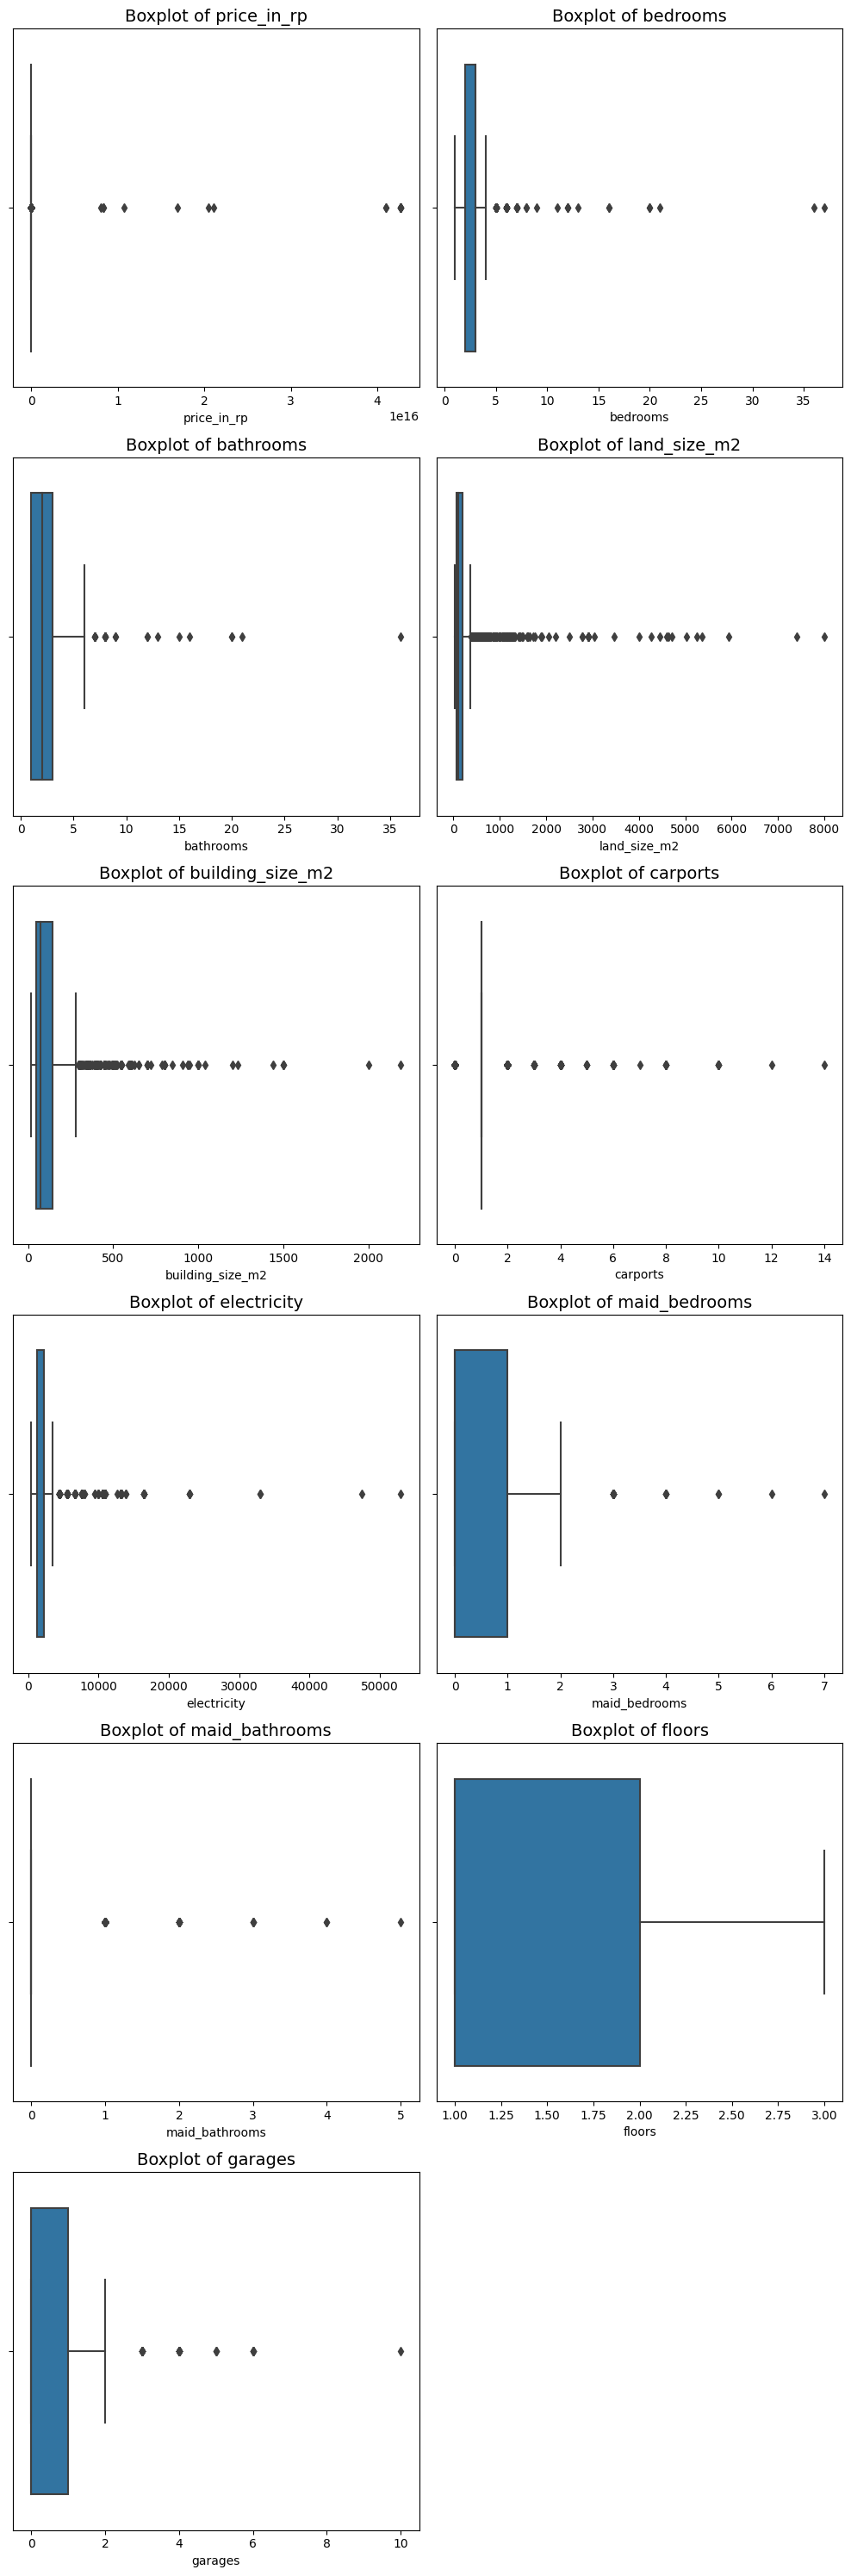

In [30]:
# Memilih feature numerik
numeric_columns = df_clean.select_dtypes(include=['int64', 'float64']).columns

# Memperkirakan jumlah baris yang diperlukan untuk plots
n = len(numeric_columns)
n_rows = n // 2
if n % 2:
    n_rows += 1

fig, axs = plt.subplots(n_rows, 2, figsize=(10, n_rows*5))

# perulangan pembuatan plot setiap feature
for ax, col in zip(axs.flatten(), numeric_columns):
    sns.boxplot(x=df_clean[col], ax=ax)
    ax.set_title(f'Boxplot of {col}', fontsize=14)

# If there's an odd number of numeric columns, delete the last Axes object
if n % 2:
    fig.delaxes(axs.flatten()[-1])

plt.tight_layout()
plt.show()

Dari boxplot ini ketahui semua numerical features memiliki outlier. Berikutnya, kita akan melakukan penanganan outlier ini dengan metode IQR

In [31]:
# Penanganan outlier pada semua data numerik dengan metode IQR
for col in numeric_columns:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_clean[col] = df_clean[col].clip(lower_bound, upper_bound)

# Mengubah sebagian fitur menjadi integer untuk menjadi bilangan bulat tanpa koma
integer_columns = ['bedrooms', 'bathrooms', 'floors', 'carports', 'maid_bedrooms', 'maid_bathrooms', 'garages']
df_clean[integer_columns] = df_clean[integer_columns].astype(int)

Mari kita lihat boxplot dari data yang sudah ditangani outlier tersebut

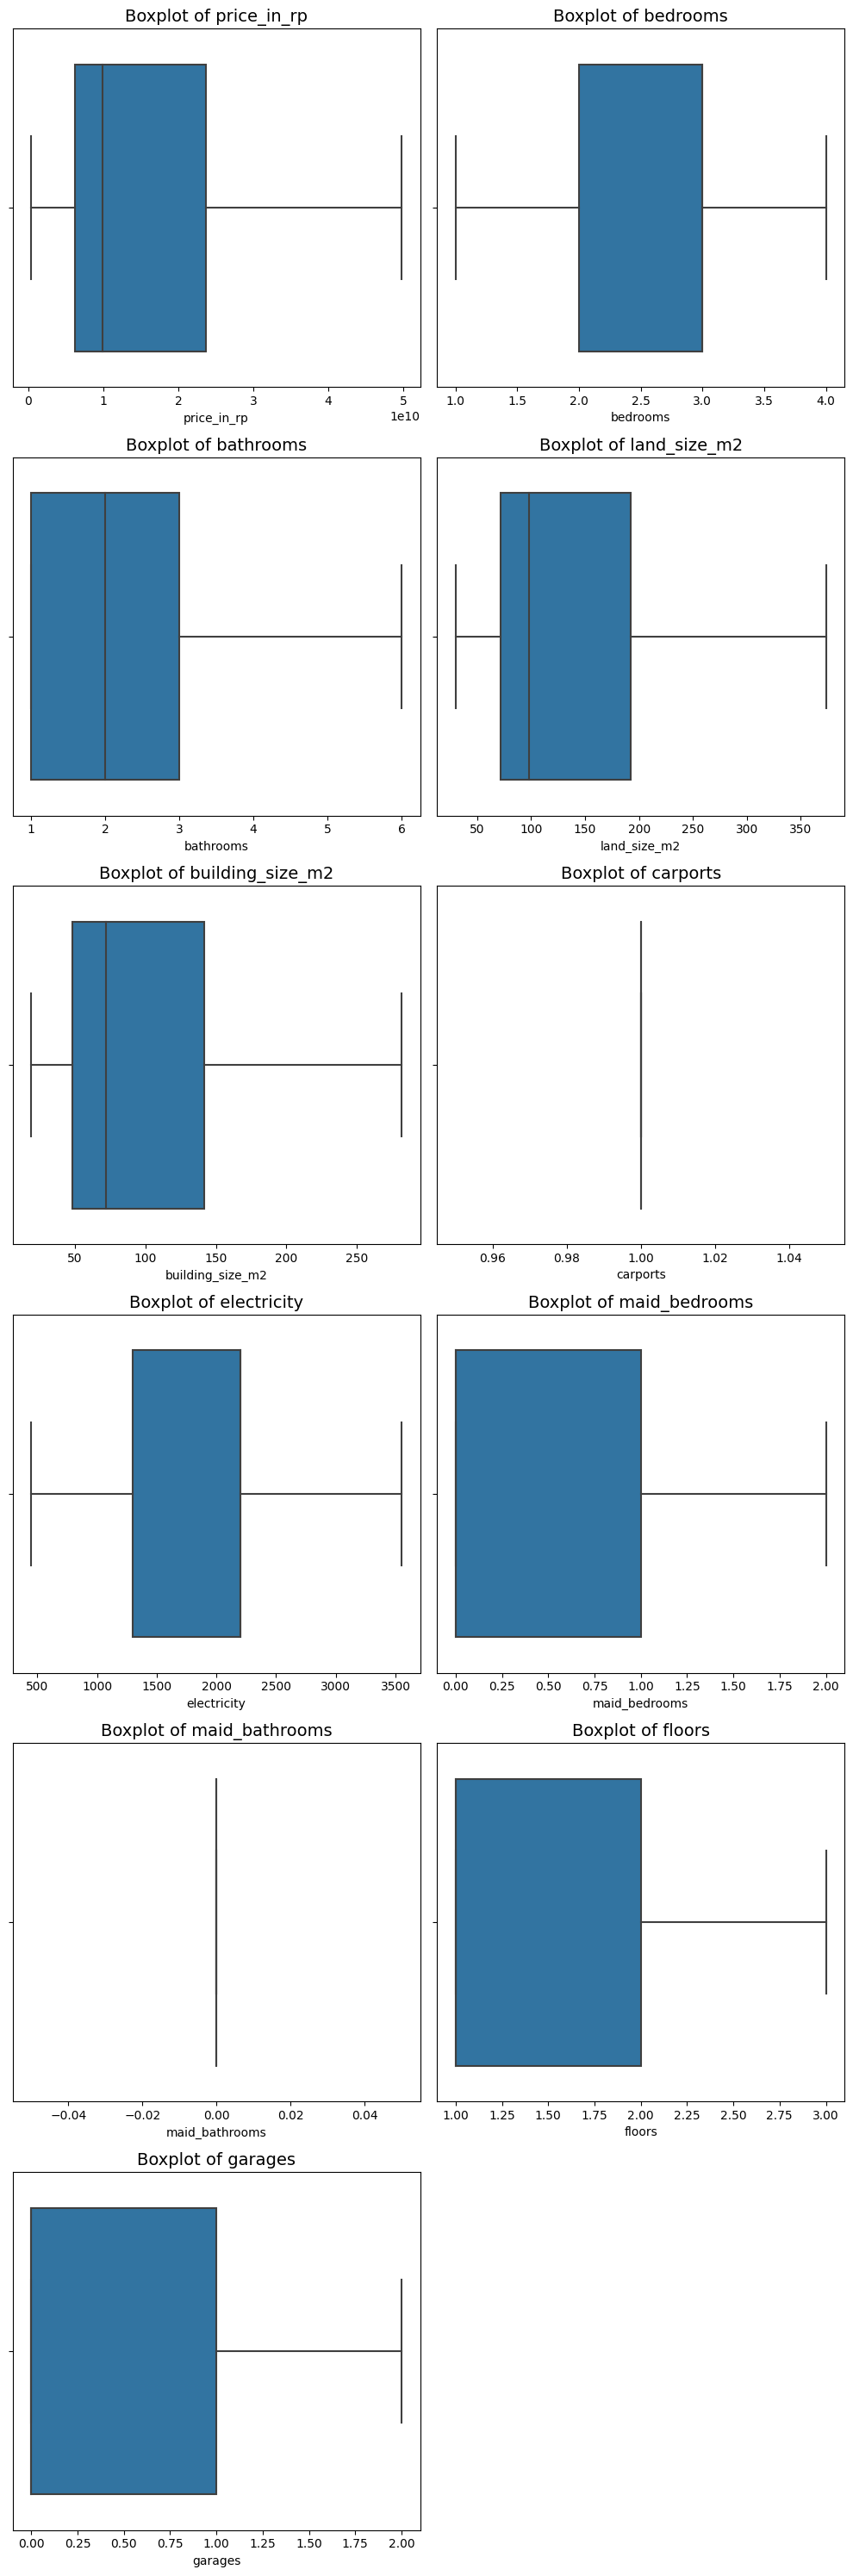

In [32]:
# Tampilkan boxplot sesudah penanganan outlier
fig, axs = plt.subplots(n_rows, 2, figsize=(10, n_rows*5))

for ax, col in zip(axs.flatten(), numeric_columns):
    sns.boxplot(x=df_clean[col], ax=ax)
    ax.set_title(f'Boxplot of {col}', fontsize=14)

if n % 2:
    fig.delaxes(axs.flatten()[-1])

plt.tight_layout()
plt.show()

Setelah itu kita ingin melihat statistik data setelah dibersihkan dari outlier

In [33]:
df_clean.describe(include='all')

,price_in_rp,city,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,certificate,electricity,maid_bedrooms,maid_bathrooms,floors,property_condition,garages,furnishing
count,1.807000e+03,1807,1807.000000,1807.000000,1807.000000,1807.000000,1807.0,1807,1807.000000,1807.000000,1807.0,1807.000000,1807,1807.000000,1807
unique,NaN,9,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,5,NaN,3
top,NaN,Bogor,NaN,NaN,NaN,NaN,NaN,shm - sertifikat hak milik,NaN,NaN,NaN,NaN,bagus,NaN,unfurnished
freq,NaN,620,NaN,NaN,NaN,NaN,NaN,1585,NaN,NaN,NaN,NaN,924,NaN,1397
mean,1.746514e+10,NaN,2.756502,2.056447,150.175706,107.747510,1.0,NaN,2103.735473,0.372994,0.0,1.452131,NaN,0.609297,NaN
std,1.593228e+10,NaN,0.777900,1.154279,106.617062,80.897693,0.0,NaN,814.902139,0.587146,0.0,0.531202,NaN,0.720743,NaN
min,4.200000e+08,NaN,1.000000,1.000000,30.000000,19.000000,1.0,NaN,450.000000,0.000000,0.0,1.000000,NaN,0.000000,NaN
25%,6.250000e+09,NaN,2.000000,1.000000,72.000000,48.000000,1.0,NaN,1300.000000,0.000000,0.0,1.000000,NaN,0.000000,NaN
50%,9.950000e+09,NaN,3.000000,2.000000,98.000000,72.000000,1.0,NaN,2200.000000,0.000000,0.0,1.000000,NaN,0.000000,NaN
75%,2.365000e+10,NaN,3.000000,3.000000,192.500000,141.500000,1.0,NaN,2200.000000,1.000000,0.0,2.000000,NaN,1.000000,NaN


Kita bisa melihat sekarang data numerik lebih bersih dan memiliki rentang yang normal. Selanjutnya kita akan menganalisis variabel kategorikal.

In [34]:
categorical_columns = df_clean.select_dtypes(include=['object','category']).columns

#### **City**

Kita lihat jumlah sampel dan persentase masing-masing label

                 jumlah sampel  persentase
Bogor                      620        34.3
Bekasi                     366        20.3
Tangerang                  348        19.3
Depok                      328        18.2
Jakarta Selatan             83         4.6
Jakarta Timur               24         1.3
Jakarta Barat               22         1.2
Jakarta Utara                9         0.5
Jakarta Pusat                7         0.4


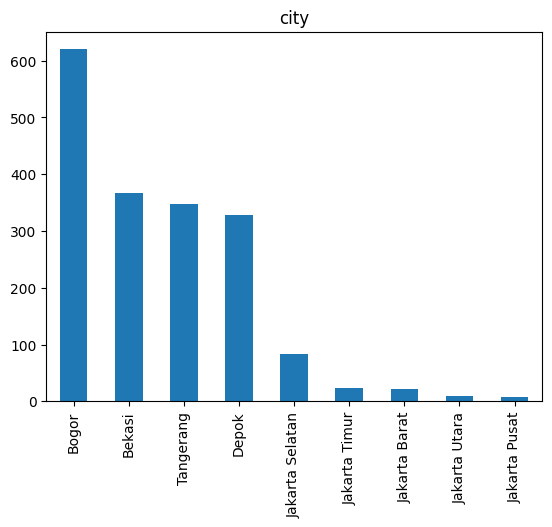

In [35]:
feature = categorical_columns[0]
count = df_clean[feature].value_counts()
percent = 100*df_clean[feature].value_counts(normalize=True)
df_clean_category = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_clean_category)
count.plot(kind='bar', title=feature);

Data kolom **City** terbanyak adalah kota Bogor, yaitu sekitar 34,3 % rumah. Adapun yang paling sedikit, rumah yang berlokasi di Jakata Pusat dengan kontribusi sekitar 0,4 % saja. Variabel **City** ini merupakan variabel kategorikal nominal (tidak ada urutannya), sehingga encoding yang tepat untuk diterapkan adalah One-Hot Encoding. Untuk efektifitas encoding, kita akan menggabungkan label dengan awalan Jakarta menjadi Jakarta saja.

In [36]:
# menggabungkan label dengan awalan Jakarta menjadi Jakarta saja.
df_clean['city'] = df_clean['city'].replace(['Jakarta Pusat', 'Jakarta Utara', 'Jakarta Selatan', 'Jakarta Timur', 'Jakarta Barat'], 'Jakarta')
count = df_clean['city'].value_counts()
print(count)

Bogor        620
Bekasi       366
Tangerang    348
Depok        328
Jakarta      145
Name: city, dtype: int64


#### **Certificate**

Kita lihat jumlah sampel dan persentase masing-masing label

                               jumlah sampel  persentase
shm - sertifikat hak milik              1585        87.7
hgb - hak guna bangunan                  137         7.6
lainnya (ppjb,girik,adat,dll)             84         4.6
hp - hak pakai                             1         0.1


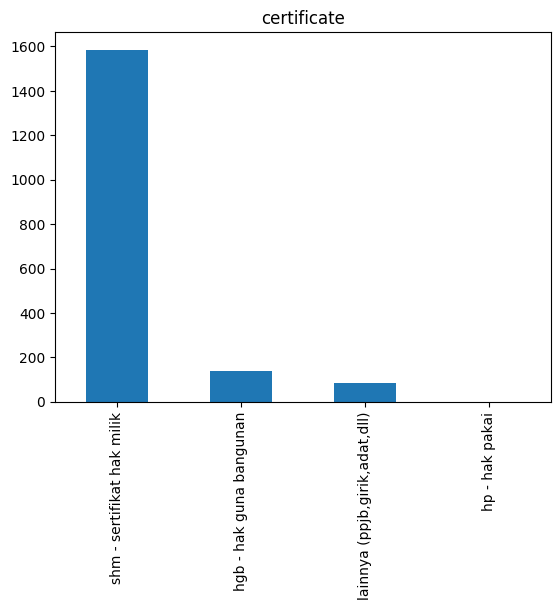

In [37]:
feature = categorical_columns[1]
count = df_clean[feature].value_counts()
percent = 100*df_clean[feature].value_counts(normalize=True)
df_clean_category = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_clean_category)
count.plot(kind='bar', title=feature);

Data kolom Certificate terbanyak adalah SHM, yaitu sekitar 87,7 % rumah. Adapun yang paling sedikit, yaitu hp (Hak Pakai) dengan kontribusi sekitar 0,1 % saja karena hanya memiliki 1 jumlah data oleh karena itu akan kita hapus. Variabel Certificate ini merupakan variabel kategorikal ordinal sehingga encoding yang tepat untuk diterapkan adalah Ordinal Encoding.

In [38]:
# ganti data 'hp - hak pakai' menjadi 'lainnya'
df_clean['certificate'].replace('hp - hak pakai', 'lainnya (ppjb,girik,adat,dll)', inplace=True)
count = df_clean['certificate'].value_counts()
print(count)

shm - sertifikat hak milik       1585
hgb - hak guna bangunan           137
lainnya (ppjb,girik,adat,dll)      85
Name: certificate, dtype: int64


#### **Property Condition**

Kita lihat jumlah sampel dan persentase masing-masing label

                jumlah sampel  persentase
bagus                     924        51.1
baru                      630        34.9
bagus sekali              119         6.6
sudah renovasi             73         4.0
butuh renovasi             61         3.4


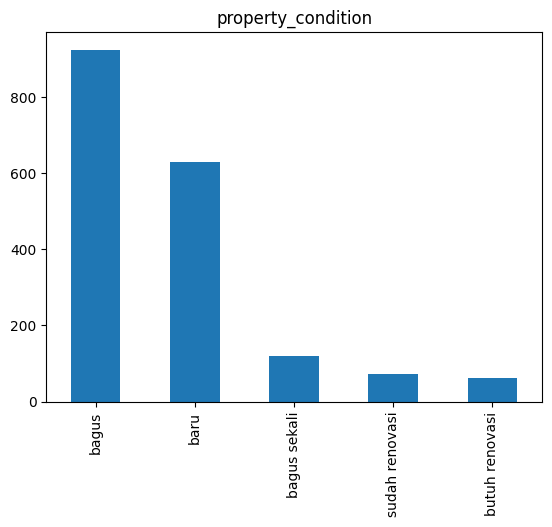

In [39]:
feature = categorical_columns[2]
count = df_clean[feature].value_counts()
percent = 100*df_clean[feature].value_counts(normalize=True)
df_clean_category = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_clean_category)
count.plot(kind='bar', title=feature);

Data kolom Property_condition terbanyak adalah 'bagus', yaitu sekitar 51,1 % dari rumah. Adapun yang paling sedikit, yaitu 'butuh renovasi' dengan kontribusi sekitar 3,4 % saja karena hanya memiliki 61 jumlah data. Variabel Property_condition ini merupakan variabel kategorikal ordinal sehingga encoding yang tepat untuk diterapkan adalah Ordinal Encoding.

#### **Furnishing**

Kita lihat jumlah sampel dan persentase masing-masing label

                jumlah sampel  persentase
unfurnished              1397        77.3
semi furnished            310        17.2
furnished                 100         5.5


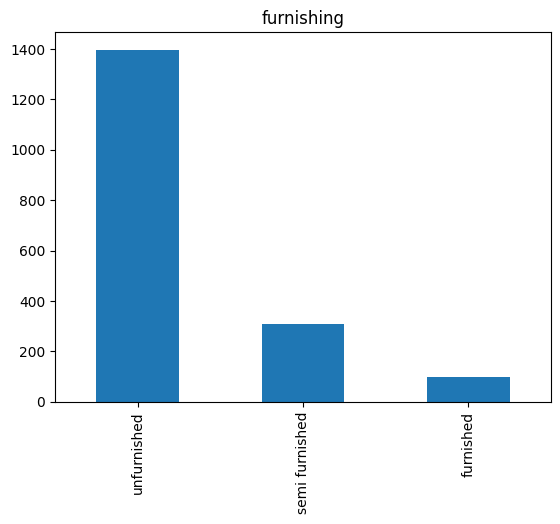

In [40]:
feature = categorical_columns[3]
count = df_clean[feature].value_counts()
percent = 100*df_clean[feature].value_counts(normalize=True)
df_clean_category = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_clean_category)
count.plot(kind='bar', title=feature);

Data kolom Furnishing terbanyak adalah 'unfurnished', yaitu sekitar 77,3 % dari rumah, diikuti oleh semi furnished dengan 17,2 % dan furnished 5,5 %. Variabel Furnishing ini merupakan variabel kategorikal ordinal sehingga encoding yang tepat untuk diterapkan adalah Ordinal Encoding.

Selanjutnya, untuk fitur numerik, kita akan melihat histogram masing-masing fiturnya menggunakan code berikut.

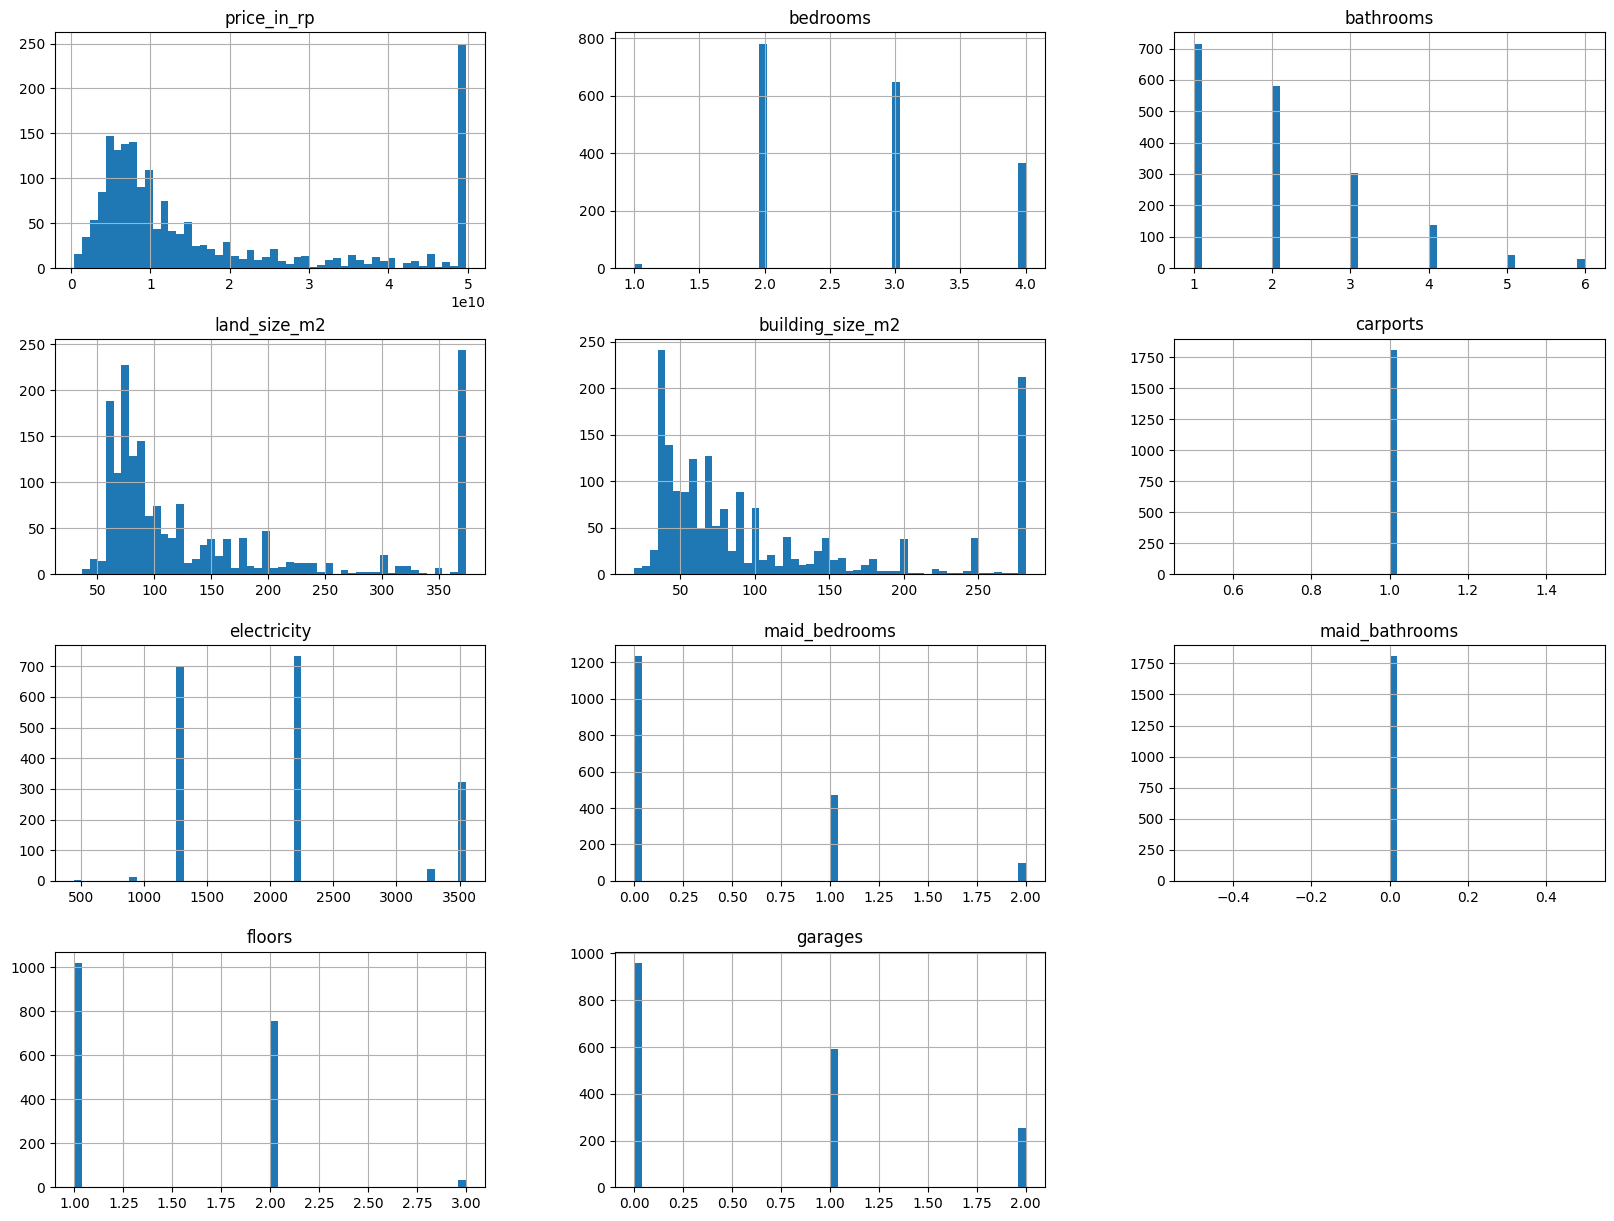

In [41]:
df_clean.hist(bins=50, figsize=(20,15))
plt.show()

Berikut interpretasi dari grafik yang bisa kita ambil :
* price_in_rp: Sebagian besar properti pada data ini memiliki harga di bawah 1.5 miliar Rupiah, dengan beberapa properti memiliki harga hingga 4.8 miliar Rupiah. Distribusi ini memiliki skew kanan, yang berarti ada beberapa properti dengan harga yang sangat tinggi yang mendorong rata-rata ke atas.

* bedrooms, bathrooms: Sebagian besar properti memiliki 2-3 kamar tidur dan 1-2 kamar mandi. Ada beberapa properti dengan lebih banyak kamar tidur dan kamar mandi

* land_size_m2, building_size_m2: Sebagian besar properti memiliki ukuran lahan dan bangunan di bawah 200 m2, dengan beberapa properti memiliki ukuran lahan dan bangunan yang jauh lebih besar. Distribusi ini juga skew ke kanan.

* carports: Semua properti memiliki 1 carport.

* electricity: Daya listrik sebagian besar antara 900 dan 2200, dengan beberapa properti memiliki daya listrik yang lebih rendah atau lebih tinggi.

* maid_bedrooms, maid_bathrooms: Sebagian besar properti tidak memiliki kamar tidur atau kamar mandi pembantu. Beberapa properti memiliki 1 atau 2 kamar tidur pembantu.

* floors: Sebagian besar properti memiliki 1 atau 2 lantai, dengan beberapa properti memiliki 3 lantai.

* garages: Sebagian besar properti tidak memiliki garasi, beberapa memiliki 1 atau 2 garasi.

Selanjutnya kita melakukan multivariate analysis.

#### Multivariate Analysis

Multivariate EDA menunjukkan hubungan antara dua atau lebih variabel pada data. Multivariate EDA yang menunjukkan hubungan antara dua variabel biasa disebut sebagai bivariate EDA. Kita akan melakukan analisis data pada categorical features terlebih dahulu dan dilanjutkan dengan numerical features

**Categorical Features**

Variabel target adalah price_in_rp yang bertipe data numerik dan kita akan melhat hubungan masing-masing dengan variabel kategori

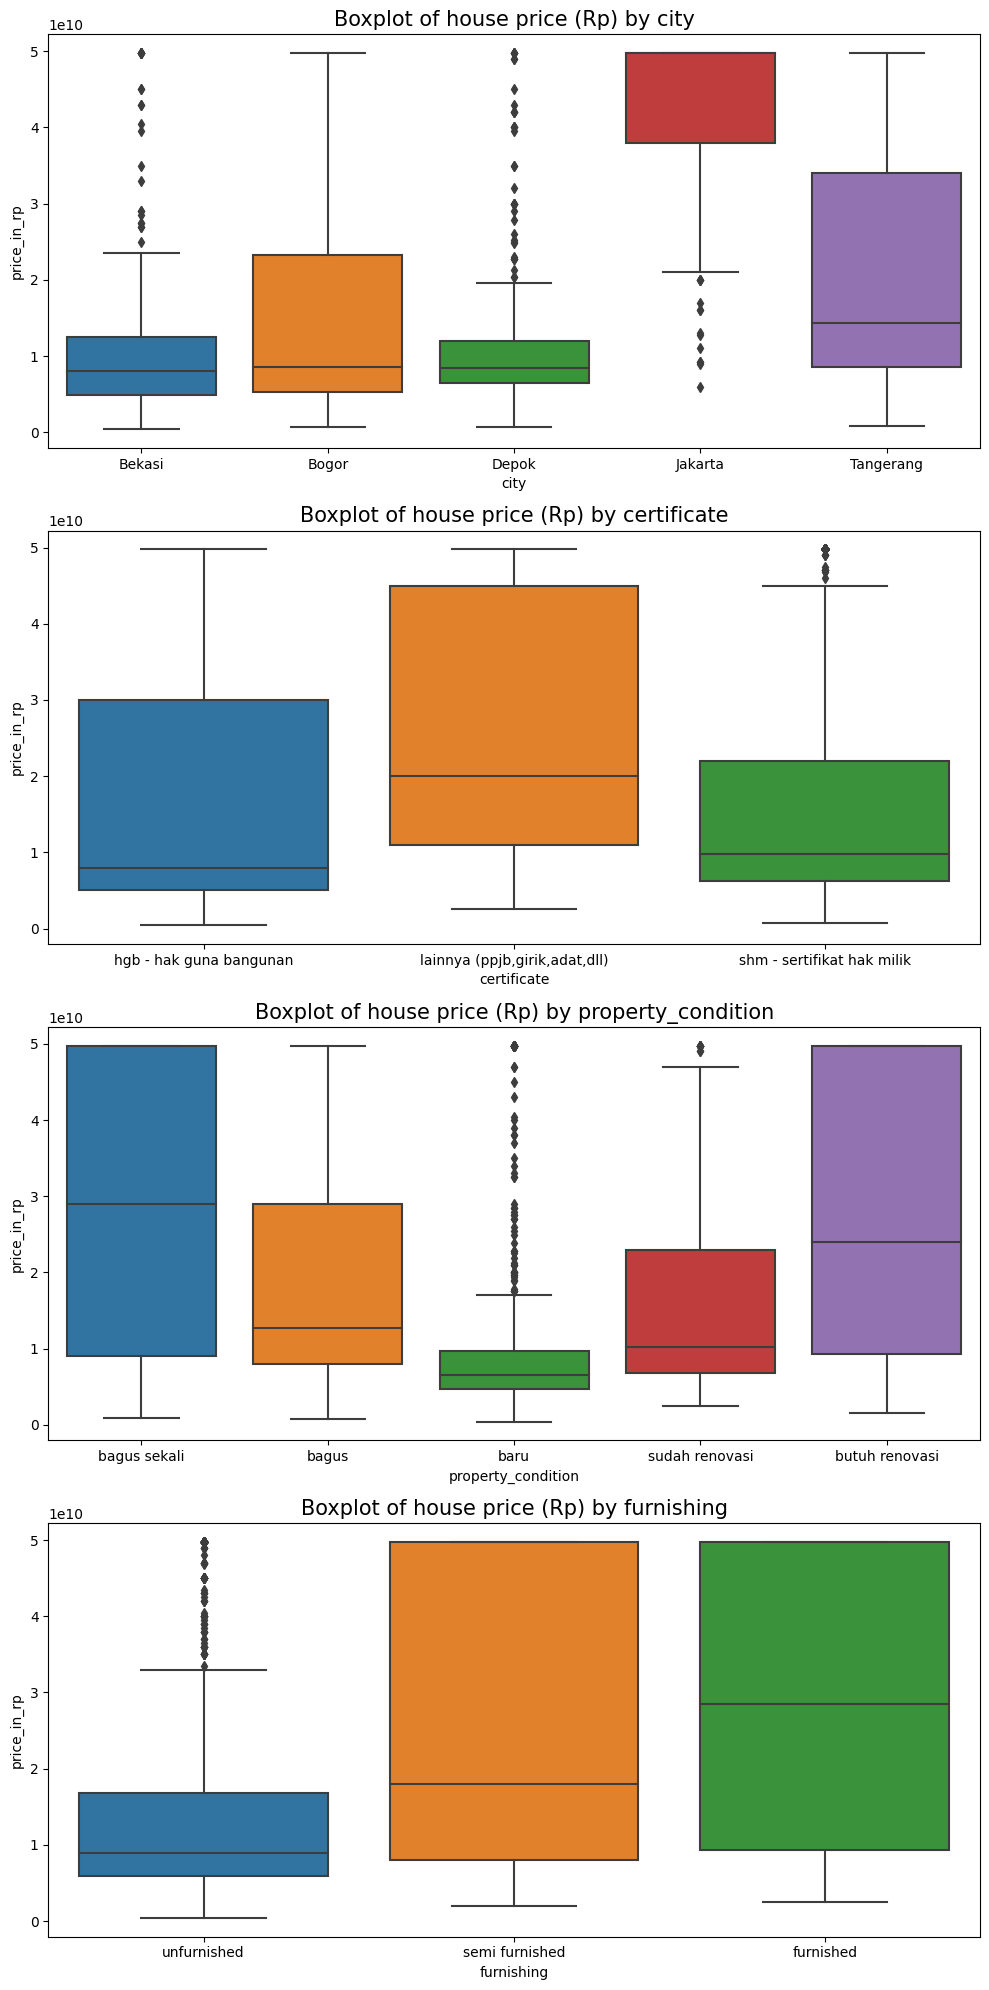

In [42]:
# Plot boxplots for categorical features
cat_cols = ['city', 'certificate', 'property_condition', 'furnishing']

fig, axs = plt.subplots(nrows=len(cat_cols), figsize=(10, 20))
for i, col in enumerate(cat_cols):
    sns.boxplot(x=col, y='price_in_rp', data=df_clean, ax=axs[i])
    axs[i].set_title(f'Boxplot of house price (Rp) by {col}', fontsize=15)
    axs[i].tick_params(axis='x')

plt.tight_layout()
plt.show()

Berikut adalah interpretasi dari boxplot untuk fitur kategorikal:

* city : Kota tempat properti berada memiliki pengaruh yang signifikan terhadap harga properti. Rata-rata properti di Jakarta cenderung memiliki harga yang lebih tinggi dibandingkan dengan kota-kota lain. Hal ini bisa jadi karena Jakarta sebagai ibukota dan memang pusat bisnis dan komersial, sehingga nilai properti di sana lebih tinggi. Namun, perlu diingat bahwa ada juga variasi harga yang besar seperti di kota Bekasi dan Depok, seperti ditunjukkan oleh outlier pada boxplot.

* certificate: Harga properti juga bervariasi berdasarkan jenis sertifikat. Properti dengan "SHM - Sertifikat Hak Milik" cenderung memiliki harga yang lebih tinggi dibandingkan dengan properti dengan sertifikat lainnya, hanya saja hubungan ini tidak terlalu signifikan.

* property_condition: Kondisi properti juga berpengaruh terhadap harga. Properti yang dalam kondisi "Bagus Sekali" cenderung memiliki harga yang lebih tinggi dibandingkan dengan properti dalam kondisi lain. Hanya saja hubungan ini tidak terlalu signifikan.

* furnishing: Perlengkapan properti atau furnishing juga berpengaruh terhadap harga. Properti yang dilengkapi perabotan cenderung memiliki harga yang lebih tinggi dibandingkan dengan properti yang tidak dilengkapi perabotan. Ini mungkin karena biaya tambahan untuk mebel dan dekorasi yang sudah ada di properti tersebut.Hanya saja hubungan ini tidak terlalu signifikan.

**Numerical Features**

Untuk mengamati hubungan antara fitur numerik, kita akan menggunakan fungsi pairplot(). Kita juga akan mengobservasi korelasi antara fitur numerik dengan fitur target menggunakan fungsi corr().

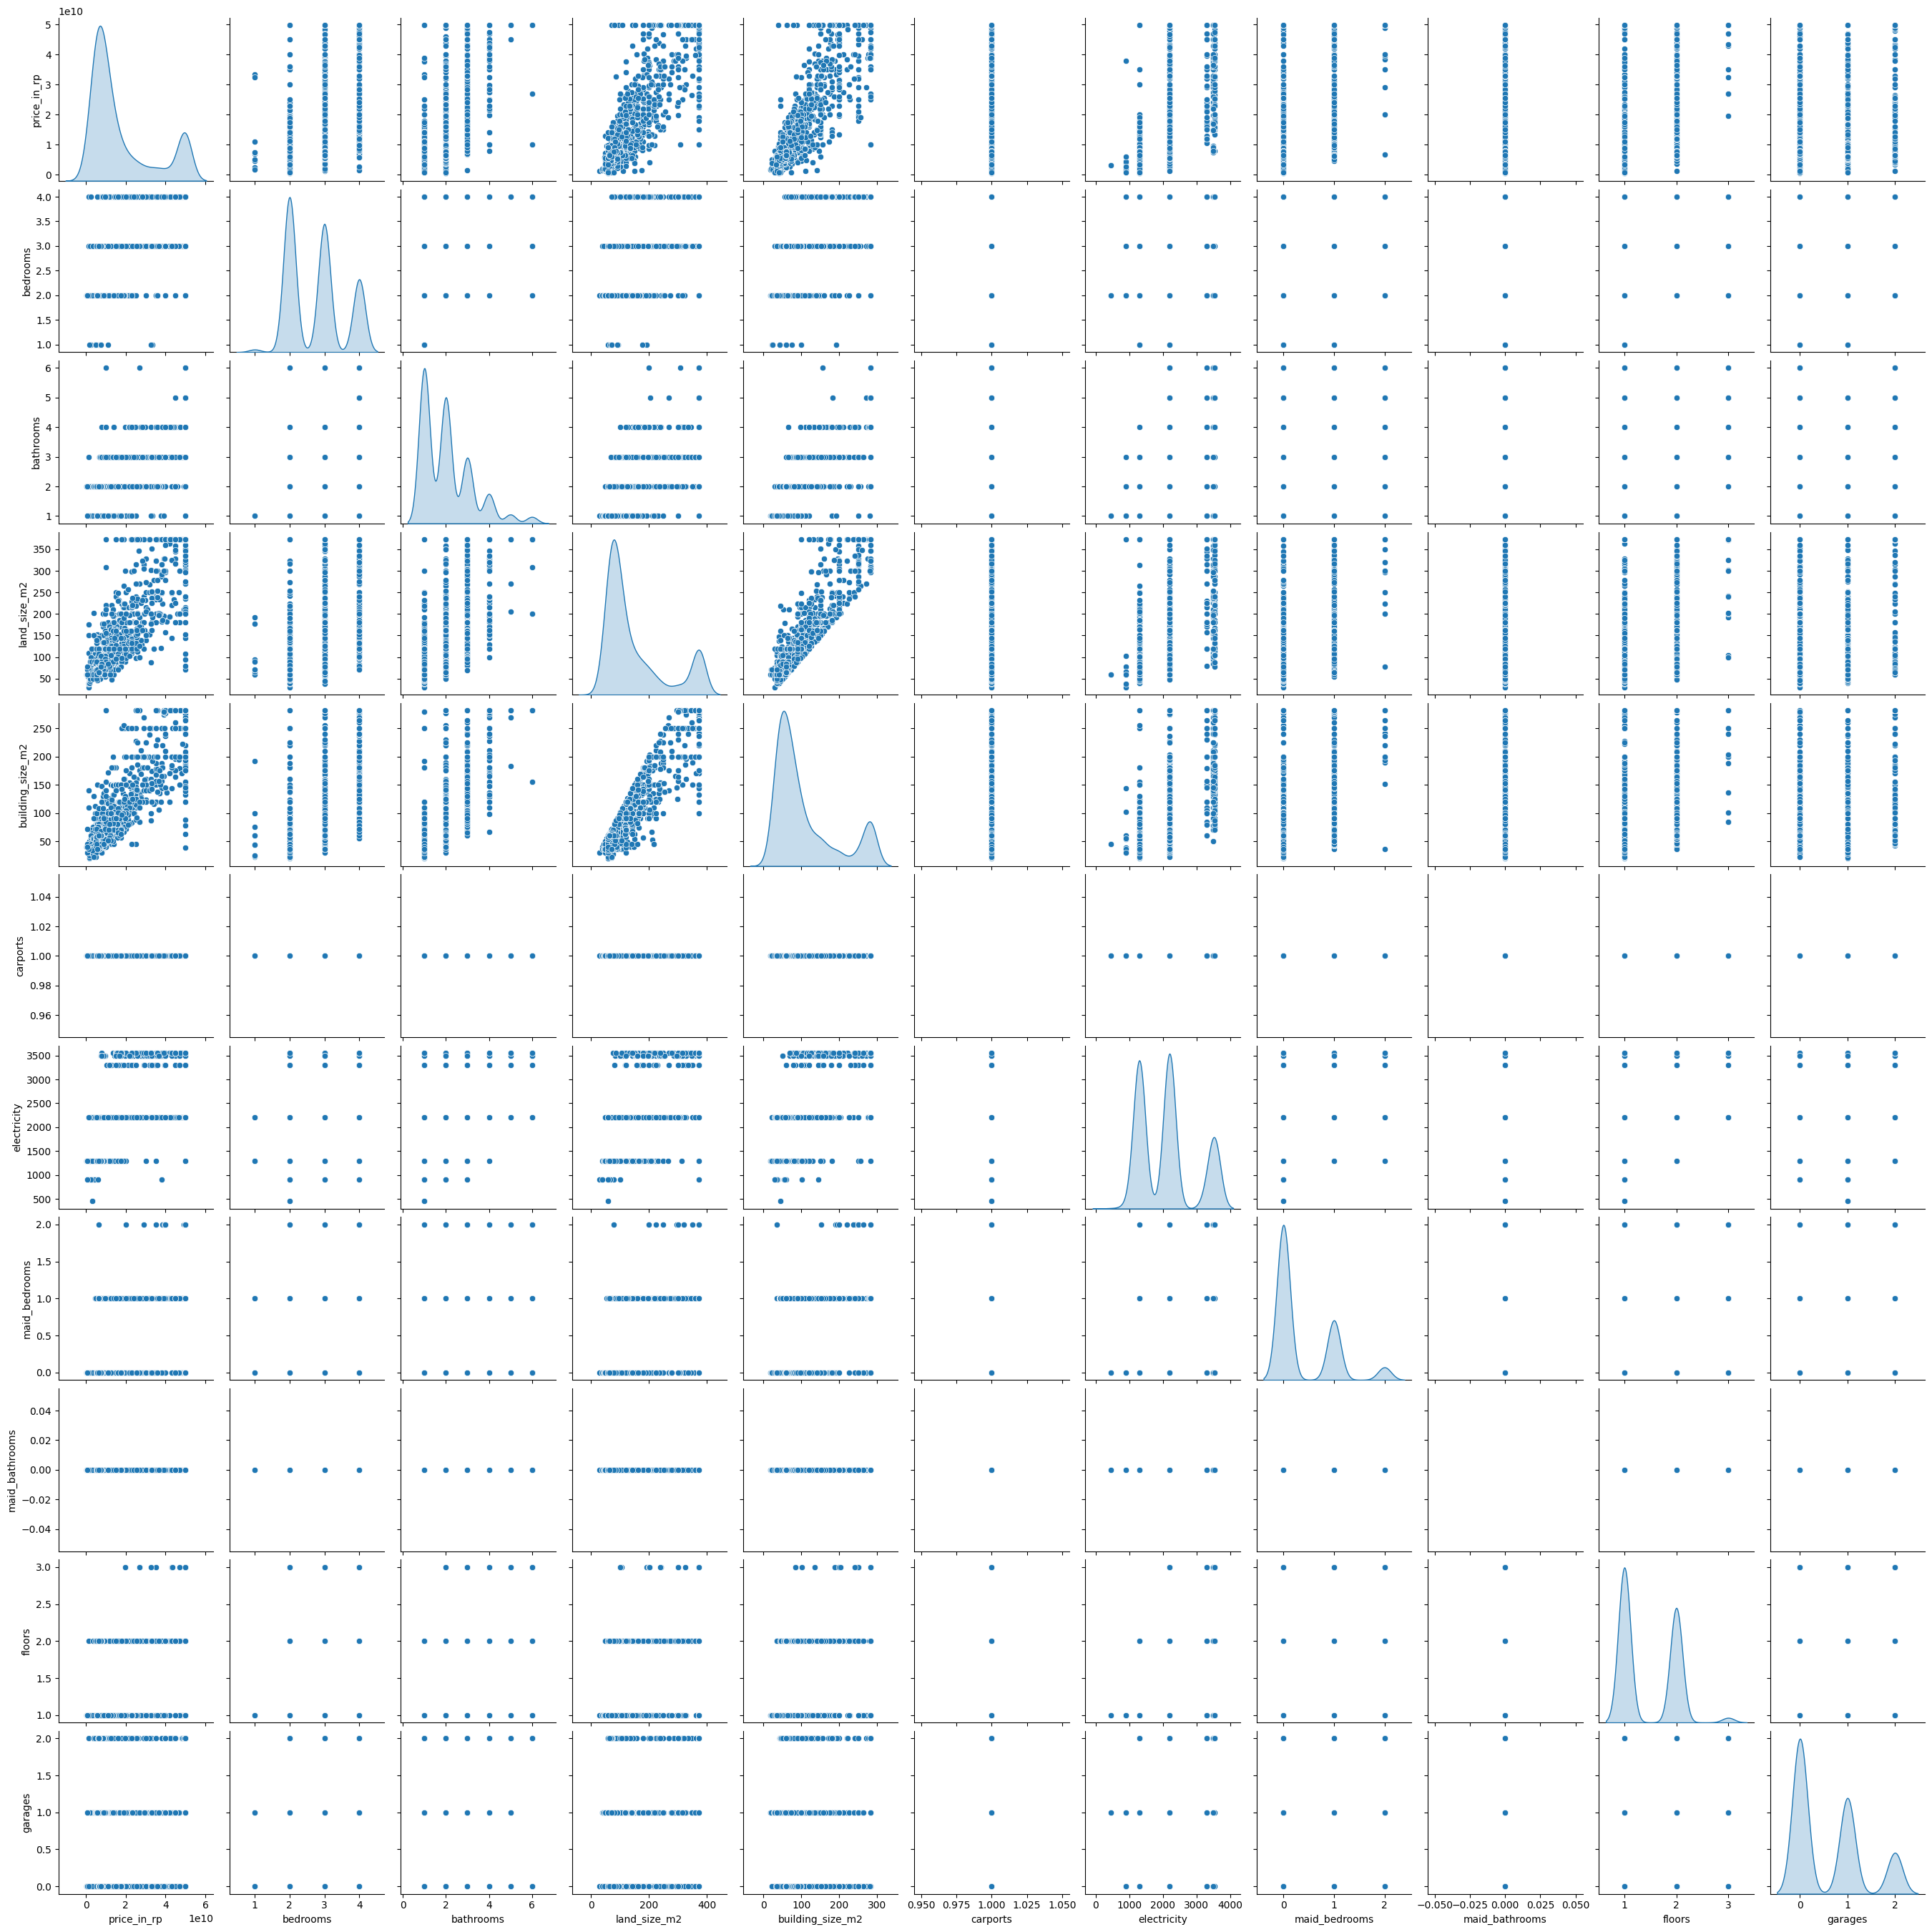

In [43]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df_clean, diag_kind = 'kde')

Dari scatterplot, kita dapat melihat hubungan antara setiap fitur numerik dengan target (price_in_rp). Meskipun tidak ada hubungan linear yang jelas antara fitur-fitur dan target, beberapa fitur seperti land_size_m2, building_size_m2, dan electricity tampak memiliki hubungan positif dengan target, yaitu ketika nilai fitur meningkat, harga juga cenderung meningkat.

Selanjutnya kita hapus dulu fitur 'carports' dan 'maid_bathrooms'yang hanya memiliki isi data yang sama (tidak memiliki varian).

In [44]:
# Menghapus fitur yang tidak diperlukan
df_clean = df_clean.drop(['carports', 'maid_bathrooms'], axis=1)

Selanjutnya kita tampilkan matriks korelasi

<ipython-input-45-6a3461d88f51>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_clean.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

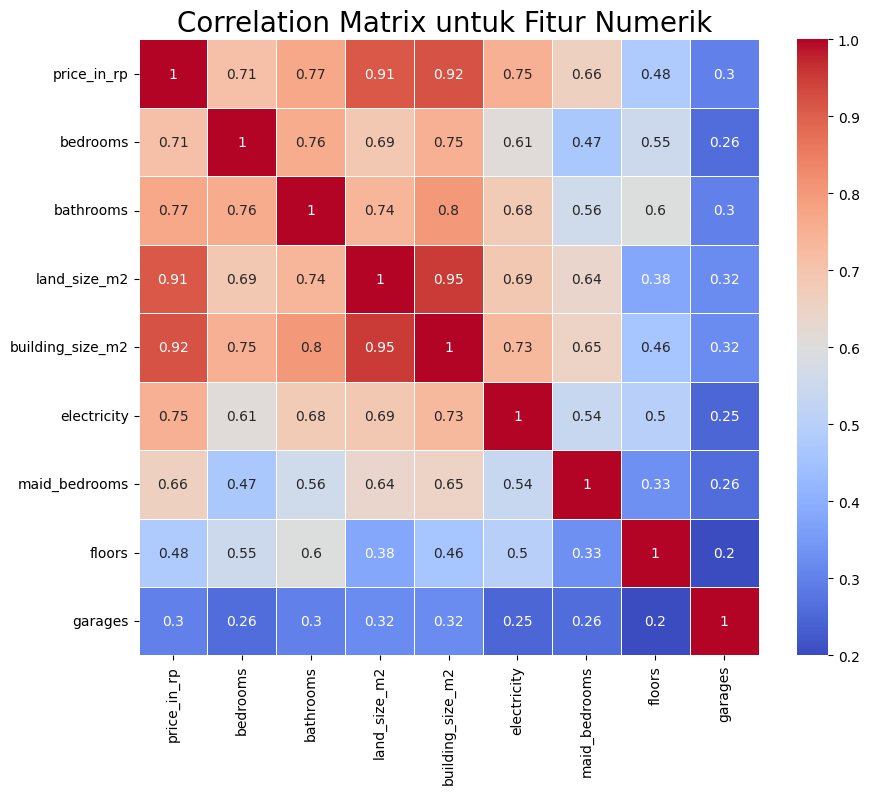

In [45]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_clean.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Dari matriks korelasi, kita dapat melihat korelasi antara setiap pasangan fitur. Nilai korelasi berkisar antara -1 hingga 1, di mana 1 berarti korelasi positif sempurna, -1 berarti korelasi negatif sempurna, dan 0 berarti tidak ada korelasi. Beberapa poin yang dapat kita ambil adalah:

* price_in_rp memiliki korelasi yang kuat dengan land_size_m2, building_size_m2, bedrooms, electricity, dan bathrooms. Bedrooms dan bathrooms juga memiliki korelasi yang kuat, yang masuk akal karena jumlah kamar tidur dan kamar mandi biasanya sebanding.
* land_size_m2 dan building_size_m2 memiliki korelasi yang sangat kuat, makin besar luas lahan biasanya makin besar juga luas bangunan
* electricity memiliki korelasi positif yang cenderung kuat dengan land_size_m2 dan building_size_m2, yang berarti properti dengan ukuran lahan dan bangunan yang lebih besar cenderung memiliki daya listrik yang lebih besar.

Dengan mempertimbangkan semua analisis ini, berikut adalah beberapa insight awal untuk fitur yang harus dipilih untuk model prediksi:

1. Semua Fitur numerik kecuali carport, garages, maid_bathrooms, dan floors harus dipertimbangkan karena mereka memiliki korelasi positif yang kuat hingga moderat dengan harga dan dapat memberikan informasi yang berharga untuk prediksi.
2. Fitur kategorikal 'City' harus dipertimbangkan karena mereka menunjukkan korelasi positif dan variasi yang signifikan dalam harga berdasarkan kategori mereka.

Selanjutnya pada tahap Data Preparation kita akan memilih fitur yang dianggap paling informatif dan berpengaruh dalam prediksi penentuan harga.

### Data Preparation

Pada bagian ini kita akan melakukan tahap persiapan data, yaitu:
* Encoding
* Fetaure Selection
* Train-test split
* standardization

#### Encoding

Untuk feature berupa kategorikal nominal (tanpa urutan) kita menggunakan Hot Encoding

In [46]:
# Melakukan one-hot encoding pada fitur 'city'
one_hot_encoded = pd.get_dummies(df_clean['city'], prefix='city')

# Menggabungkan hasil one-hot encoding dengan dataframe asli
df_city = pd.concat([df_clean, one_hot_encoded], axis=1)
df_city = df_city.drop(['city'], axis=1)

# Menampilkan dataframe yang telah diencode
df_city.head(5)

,price_in_rp,bedrooms,bathrooms,land_size_m2,building_size_m2,certificate,electricity,maid_bedrooms,floors,property_condition,garages,furnishing,city_Bekasi,city_Bogor,city_Depok,city_Jakarta,city_Tangerang
3,33000000000,3,3,180.0,174.0,shm - sertifikat hak milik,3500,1,2,bagus sekali,2,unfurnished,1,0,0,0,0
4,45000000000,4,3,328.0,196.0,shm - sertifikat hak milik,3500,1,2,bagus,1,unfurnished,1,0,0,0,0
6,23500000000,2,2,144.0,144.0,hgb - hak guna bangunan,3550,0,2,bagus,1,unfurnished,1,0,0,0,0
8,29000000000,3,3,200.0,152.0,shm - sertifikat hak milik,3550,2,2,bagus,0,semi furnished,1,0,0,0,0
11,9520000000,2,2,55.0,50.0,"lainnya (ppjb,girik,adat,dll)",2200,0,2,baru,0,unfurnished,1,0,0,0,0


Untuk feature berupa kategorikal ordinal kita menggunakan Ordinal Encoding

In [47]:
# menyusun data kategori
certificate_order = [
    'lainnya (ppjb,girik,adat,dll)', 'hgb - hak guna bangunan',
    'shm - sertifikat hak milik',
    ]
property_condition_order = [
     'butuh renovasi','sudah renovasi','baru','bagus','bagus sekali'
    ]

furnishing_order = [
      'unfurnished','semi furnished','furnished'
    ]

# Daftar fitur yang akan diencode
fitur_list = ['certificate', 'property_condition', 'furnishing']

# Membentuk dataframe kosong untuk menyimpan hasil encoding
df_encoded = pd.DataFrame()

# Melakukan ordinal encoding dengan perulangan
for fitur, order_list in zip(fitur_list, [certificate_order, property_condition_order, furnishing_order]):
    # Mengurutkan kategori fitur berdasarkan urutan tertentu
    mapping = {category: index for index, category in enumerate(order_list)}

    # Melakukan ordinal encoding pada fitur
    encoded_column = f'{fitur}_encoded'
    df_encoded[encoded_column] = df_clean[fitur].map(mapping)

# Menggabungkan df_encoded dengan df_city
df_encoded = pd.concat([df_city, df_encoded], axis=1)

#Menghapus fitur kategori pada df_encoded
df_encoded = df_encoded.drop(fitur_list, axis=1)

# Memastikan df_encoded telah tergabung secara benar
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1807 entries, 3 to 3552
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   price_in_rp                 1807 non-null   int64   
 1   bedrooms                    1807 non-null   int64   
 2   bathrooms                   1807 non-null   int64   
 3   land_size_m2                1807 non-null   float64 
 4   building_size_m2            1807 non-null   float64 
 5   electricity                 1807 non-null   int64   
 6   maid_bedrooms               1807 non-null   int64   
 7   floors                      1807 non-null   int64   
 8   garages                     1807 non-null   int64   
 9   city_Bekasi                 1807 non-null   uint8   
 10  city_Bogor                  1807 non-null   uint8   
 11  city_Depok                  1807 non-null   uint8   
 12  city_Jakarta                1807 non-null   uint8   
 13  city_Tangerang    

#### Feature Selection

Langkah selanjutnya adalah melakukan seleksi fitur. Kita akan menggunakan metode f_classif dan chi2 untuk mengetahui fitur-fitur yang paling banyak berpengaruh terhadap target.

In [48]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

# Memisahkan fitur dan target
X = df_encoded.drop('price_in_rp', axis=1)
y = df_encoded['price_in_rp']

# Melakukan seleksi fitur terbaik untuk fitur numerik dengan f_classif
selector_f_classif = SelectKBest(score_func=f_classif, k='all')
X_new_f_classif = selector_f_classif.fit_transform(X, y)

# Melakukan seleksi fitur terbaik untuk fitur numerik dengan chi2
selector_chi2 = SelectKBest(score_func=chi2, k='all')
X_new_chi2 = selector_chi2.fit_transform(X, y)

Selanjutnya kita tampilkan urutan skor dari yang tertinggi ke paling terendah

In [49]:
# Menampilkan skor dari seleksi fitur
for score_f, score_chi2, col in sorted(zip(selector_f_classif.scores_, selector_chi2.scores_, X.columns), key=lambda x: x[0], reverse=True):
    print(f'{col}: {score_f:.2f}, {score_chi2:.2f}')

building_size_m2: 28.63, 96675.52
land_size_m2: 26.62, 119407.96
electricity: 9.32, 403257.69
bathrooms: 9.30, 827.27
bedrooms: 8.55, 273.27
maid_bedrooms: 4.60, 908.08
floors: 4.15, 181.98
city_Depok: 2.70, 609.65
city_Bekasi: 2.39, 552.20
city_Tangerang: 2.16, 523.55
garages: 2.07, 538.78
city_Jakarta: 1.94, 557.13
furnishing_encoded: 1.82, 642.14
city_Bogor: 1.78, 374.31
property_condition_encoded: 1.47, 130.94
certificate_encoded: 1.27, 57.69


Dari hasil analisa diketahui bahwa build_size_m2 dan land_size_m2 atau ukuran bangunan dan lahan memiliki pengaruh yang sangat signifikan terhadap harga rumah. Hanya saja metode ini tidak mempertimbangkan interaksi antara fitur. Oleh karena itu dalam model kita akan memasukkan 5 feature teratas ditambah 5 feature dari kota/city.

1. building_size_m2
2. land_size_m2
3. electricity
4. bathrooms
5. bedrooms
6. city_Depok
7. city_Bekasi
8. city_Tangerang
9. city_Jakarta
10. city_Bogor

#### Train-Test-Split



Dalam model ini kita menggunakan proporsi pemisahan 80:20 atau sekitar 300-an data uji sampel.

In [50]:
# Select the features
selected_features = ['building_size_m2','land_size_m2','bathrooms','electricity','bedrooms', \
                     'city_Depok','city_Bekasi','city_Tangerang','city_Jakarta','city_Bogor']
X = X[selected_features]

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Kita tampilkan jumlah masing-masing sampel

In [51]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1807
Total # of sample in train dataset: 1445
Total # of sample in test dataset: 362


#### Standardization

In [52]:
from sklearn.preprocessing import StandardScaler

# Fitur-fitur yang akan distandarisasi
numeric_features = ['land_size_m2', 'building_size_m2', 'bedrooms', 'bathrooms', 'electricity']

# Mengambil subset fitur yang akan distandarisasi
X_train_selected = X_train[numeric_features]
X_test_selected = X_test[numeric_features]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

Setelah distandarisasi, kita gabung array-nya dengan fitur hasil encoding pilihan yang tidak ikut distandarisasi.

In [53]:
# Fitur-fitur encoding tanpa standarisasi
encoding_features = ['city_Depok', 'city_Bekasi', 'city_Tangerang', 'city_Jakarta', 'city_Bogor']

# Mengambil subset fitur lain yang akan digabungkan
X_train_encode = X_train[encoding_features]
X_test_encode = X_test[encoding_features]

# Menggabungkan fitur-fitur yang sudah distandarisasi dengan fitur-fitur lain
X_train_std = np.concatenate((X_train_scaled, X_train_encode), axis=1)
X_test_std = np.concatenate((X_test_scaled, X_test_encode), axis=1)

Sampai di tahap ini, data kita telah siap untuk dilatih menggunakan model machine learning

### Modelling

Pada tahap ini, kita akan mengembangkan model machine learning dengan tiga algoritma. Kemudian, kita akan mengevaluasi performa masing-masing algoritma dan menentukan algoritma mana yang memberikan hasil prediksi terbaik. Ketiga algoritma yang akan kita gunakan, antara lain:

1. Linear Regression
2. Random Forest
3. Extreme Gradient Boosting

#### 1. Linear Regresion Model

In [66]:
# Membangun Linear Regression model
lr_model = LinearRegression(fit_intercept=True, n_jobs=-1)

# Melakukan pelatihan model
lr_model.fit(X_train_std, y_train)

LinearRegression(n_jobs=-1)

#### 2. Random Forest Model

In [57]:
# Membangun Random Forest model
rf_model = RandomForestRegressor(max_depth=10, min_samples_leaf=2, n_estimators=400, random_state=123)

# Melakukan pelatihan model
rf_model.fit(X_train_std, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, n_estimators=400,
                      random_state=123)

#### 3. XGB Model

In [58]:
# Inisialisasi objek XGBRegressor
xgb_model = xgb.XGBRegressor(learning_rate= 0.1, max_depth=3, min_child_weight=4, n_estimators=50, random_state=123)

# Melakukan pelatihan model
xgb_model.fit(X_train_std, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=123, ...)

### Evaluation

kita menggunakan metrik RMSE (Root Mean Squard Error) daripada MSE karena memberikan kesalahan dalam unit yang sama dengan variabel target, sehingga lebih mudah diinterpretasikan. RMSE juga memberikan bobot lebih pada kesalahan yang besar, karena mengambil akar kuadrat dari nilai MSE. Selain itu juga dengan R2 yaitu ukuran seberapa baik variabel target dapat dijelaskan oleh fitur-fitur yang digunakan dalam model. Rentang nilai R2 adalah antara 0 hingga 1.

In [67]:
# Metrik Evaluasi untuk data training
lr_train_predictions = lr_model.predict(X_train_std)
rf_train_predictions = rf_model.predict(X_train_std)
xgb_train_predictions = xgb_model.predict(X_train_std)

# Metrik Evaluasi untuk data uji
lr_test_predictions = lr_model.predict(X_test_std)
rf_test_predictions = rf_model.predict(X_test_std)
xgb_test_predictions = xgb_model.predict(X_test_std)

# Menghitung RMSE dan R2 dari model Regresi Linier
lr_train_rmse = np.sqrt(mean_squared_error(y_train, lr_train_predictions))
lr_test_rmse = np.sqrt(mean_squared_error(y_test, lr_test_predictions))
lr_train_r2 = r2_score(y_train, lr_train_predictions)
lr_test_r2 = r2_score(y_test, lr_test_predictions)

# Menghitung RMSE dan R2 dari model Random Forest
rf_train_rmse = np.sqrt(mean_squared_error(y_train, rf_train_predictions))
rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_predictions))
rf_train_r2 = r2_score(y_train, rf_train_predictions)
rf_test_r2 = r2_score(y_test, rf_test_predictions)

# Menghitung RMSE dan R2 dari model XGB
xgb_train_rmse = np.sqrt(mean_squared_error(y_train, xgb_train_predictions))
xgb_test_rmse = np.sqrt(mean_squared_error(y_test, xgb_test_predictions))
xgb_train_r2 = r2_score(y_train, xgb_train_predictions)
xgb_test_r2 = r2_score(y_test, xgb_test_predictions)

# Create a DataFrame for the evaluation metrics
eval_metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGB'],
    'RMSE Train': [lr_train_rmse, rf_train_rmse, xgb_train_rmse],
    'RMSE Test': [lr_test_rmse, rf_test_rmse, xgb_test_rmse],
    'R2 Train': [lr_train_r2, rf_train_r2, xgb_train_r2],
    'R2 Test': [lr_test_r2, rf_test_r2, xgb_test_r2]
})

#Panggil metrik evaluasi
eval_metrics

,Model,RMSE Train,RMSE Test,R2 Train,R2 Test
0,Linear Regression,5.373096e+09,4.910387e+09,0.883571,0.911360
1,Random Forest,3.109166e+09,4.576879e+09,0.961015,0.922991
2,XGB,4.399870e+09,4.663385e+09,0.921928,0.920053


Berdasarkan metrik ini, ketiga algoritma memiliki nilai R2 cukup baik (0.90 lebih untuk data uji), yang menunjukkan bahwa ketiga model ini dapat menjelaskan 90% dari variabilitas dalam data target. Saya cenderung memilih model Random Forest karena memiliki performa yang baik pada data pengujian (RMSE paling rendah dan R2 paling tinggi) serta tingkat overfitting yang lebih rendah dibandingkan dengan XGB.

Setelah itu kita akan mengidentifikasi fitur yang paling penting dengan Random Forest.

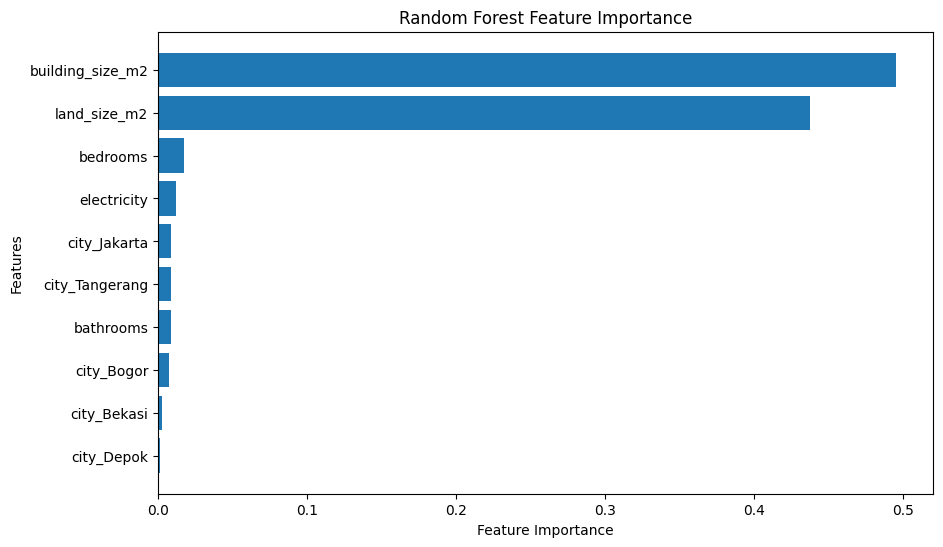

In [68]:
# Melakukan pelatihan model
rf_model.fit(X_train_std, y_train)

# Mendapatkan feature importance
importance = rf_model.feature_importances_

# Mendapatkan nama-nama fitur dari data
feature_names = X_train.columns

# Mengurutkan feature importance dari yang tertinggi ke yang terendah
sorted_indices = importance.argsort()[::1]
sorted_importance = importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Menampilkan feature importance dalam bentuk grafik batang
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_importance)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.show()

Dari hasil ini diketahui bahwa fitur yang paling penting adalah Ukuran lahan dan diikuti oleh ukuran bangunan